In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt
import os
import pandas as pd
from datetime import datetime
import numpy as np

In [3]:
# Get data
# os.system("./get_data.sh")

Directory: TEST_NO_6_20210621111031
data directory: ../hpa_test_data/TEST_NO_6_20210621111031
epi-bf-75bc7ff569-nqrm8.txt
f_name:  ../hpa_test_data/TEST_NO_6_20210621111031/epi-bf-75bc7ff569-nqrm8.txt


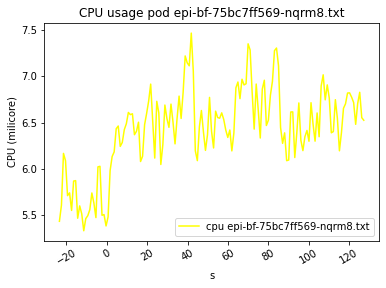

f_name:  ../hpa_test_data/TEST_NO_6_20210621111031/epi-proxy-5447cc89bf-b29bs.txt


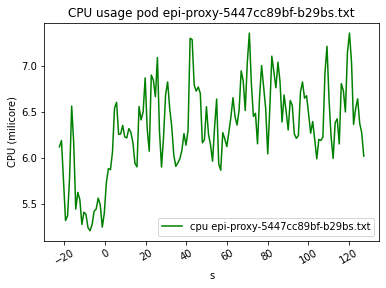

f_name:  ../hpa_test_data/TEST_NO_6_20210621111031/epi-server-5df4677b7-ghbsp.txt


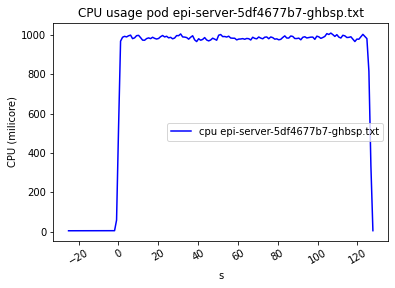

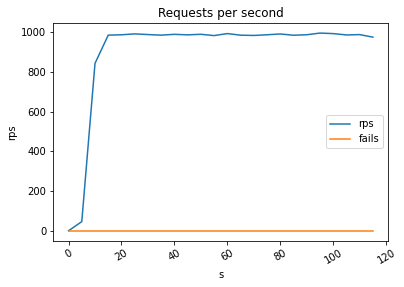

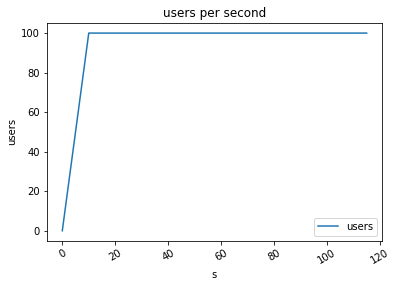

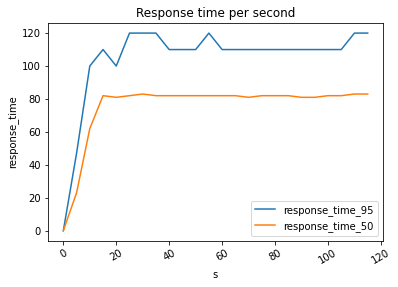

Directory: TEST_NO_9_20210621111909
data directory: ../hpa_test_data/TEST_NO_9_20210621111909
epi-bf-7fccdf5f46-tpnlq.txt
f_name:  ../hpa_test_data/TEST_NO_9_20210621111909/epi-bf-7fccdf5f46-tpnlq.txt
epi-bf-7fccdf5f46-24lw5.txt
f_name:  ../hpa_test_data/TEST_NO_9_20210621111909/epi-bf-7fccdf5f46-24lw5.txt
epi-bf-7fccdf5f46-m5fkg.txt
f_name:  ../hpa_test_data/TEST_NO_9_20210621111909/epi-bf-7fccdf5f46-m5fkg.txt
epi-bf-7fccdf5f46-g8gxx.txt
f_name:  ../hpa_test_data/TEST_NO_9_20210621111909/epi-bf-7fccdf5f46-g8gxx.txt
epi-bf-7fccdf5f46-fc559.txt
f_name:  ../hpa_test_data/TEST_NO_9_20210621111909/epi-bf-7fccdf5f46-fc559.txt


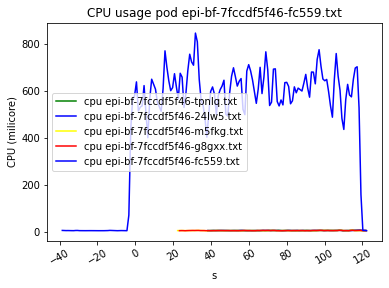

f_name:  ../hpa_test_data/TEST_NO_9_20210621111909/epi-proxy-5447cc89bf-6mgs7.txt


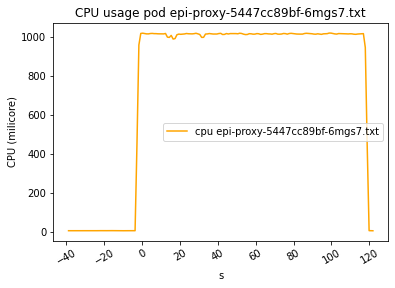

f_name:  ../hpa_test_data/TEST_NO_9_20210621111909/epi-server-5df4677b7-24rll.txt


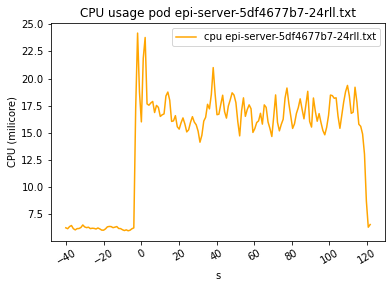

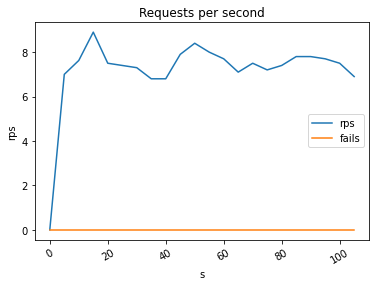

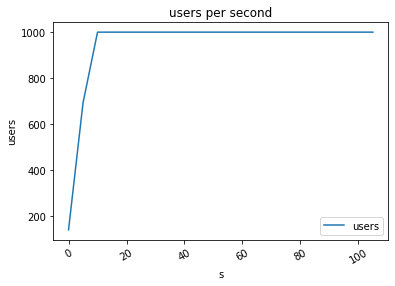

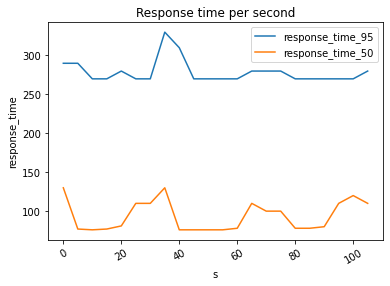

Directory: TEST_NO_16_20210621114015
data directory: ../hpa_test_data/TEST_NO_16_20210621114015
epi-bf-74d5f4df87-8rck4.txt
f_name:  ../hpa_test_data/TEST_NO_16_20210621114015/epi-bf-74d5f4df87-8rck4.txt


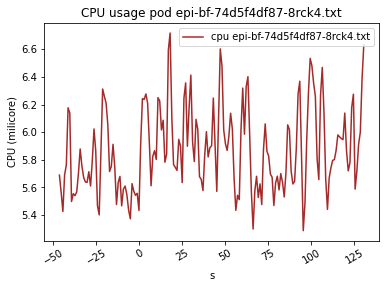

f_name:  ../hpa_test_data/TEST_NO_16_20210621114015/epi-proxy-5447cc89bf-g452h.txt


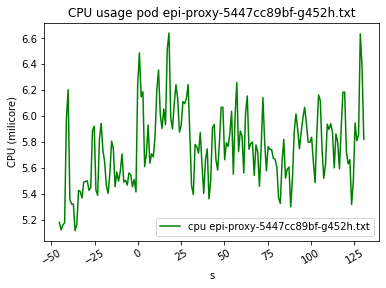

f_name:  ../hpa_test_data/TEST_NO_16_20210621114015/epi-server-5df4677b7-xhnmm.txt


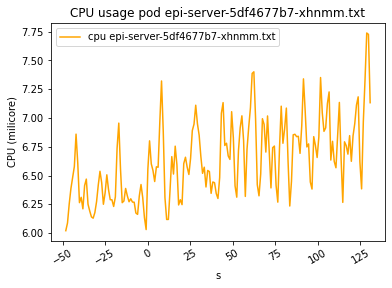

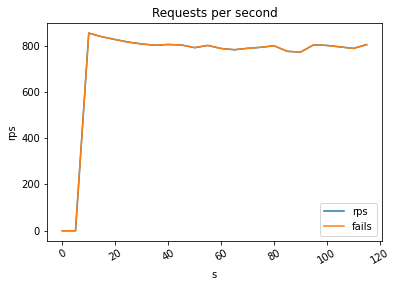

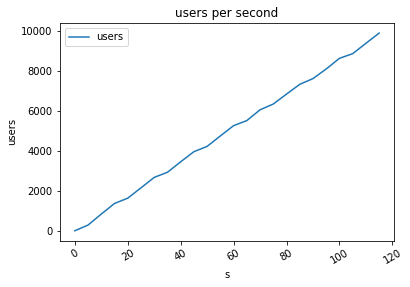

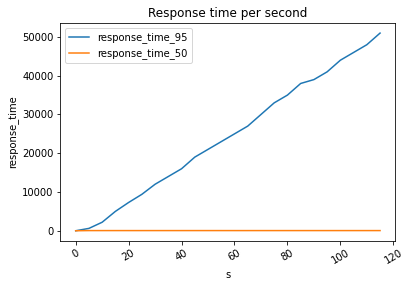

Directory: TEST_NO_10_20210621112208
data directory: ../hpa_test_data/TEST_NO_10_20210621112208
epi-bf-75bc7ff569-rnf2r.txt
f_name:  ../hpa_test_data/TEST_NO_10_20210621112208/epi-bf-75bc7ff569-rnf2r.txt


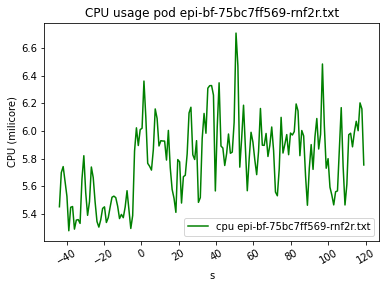

f_name:  ../hpa_test_data/TEST_NO_10_20210621112208/epi-server-5df4677b7-z94g6.txt


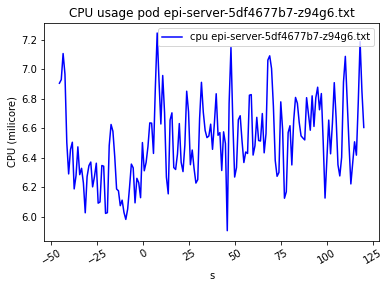

f_name:  ../hpa_test_data/TEST_NO_10_20210621112208/epi-proxy-5447cc89bf-mmb6l.txt


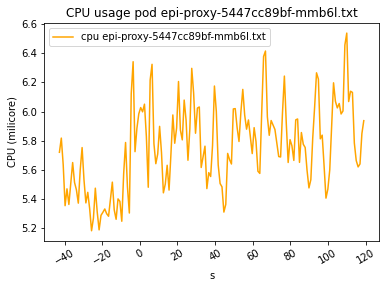

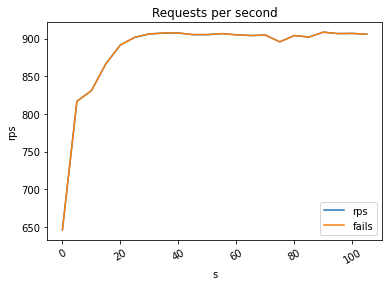

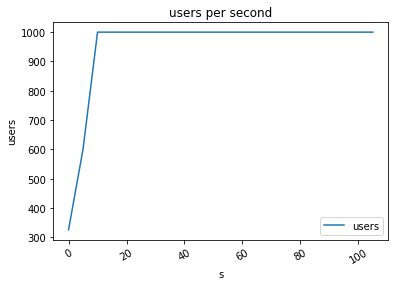

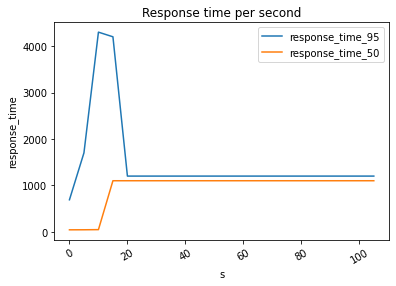

Directory: TEST_NO_2_20210621105849
data directory: ../hpa_test_data/TEST_NO_2_20210621105849
epi-bf-75bc7ff569-28wns.txt
f_name:  ../hpa_test_data/TEST_NO_2_20210621105849/epi-bf-75bc7ff569-28wns.txt
epi-bf-75bc7ff569-6brxg.txt
f_name:  ../hpa_test_data/TEST_NO_2_20210621105849/epi-bf-75bc7ff569-6brxg.txt
epi-bf-75bc7ff569-hnpxs.txt
f_name:  ../hpa_test_data/TEST_NO_2_20210621105849/epi-bf-75bc7ff569-hnpxs.txt
epi-bf-75bc7ff569-kfk5h.txt
f_name:  ../hpa_test_data/TEST_NO_2_20210621105849/epi-bf-75bc7ff569-kfk5h.txt
epi-bf-75bc7ff569-wd2m8.txt
f_name:  ../hpa_test_data/TEST_NO_2_20210621105849/epi-bf-75bc7ff569-wd2m8.txt


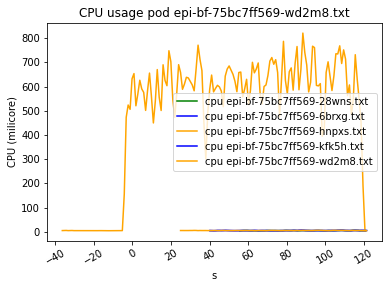

f_name:  ../hpa_test_data/TEST_NO_2_20210621105849/epi-server-5df4677b7-nd559.txt


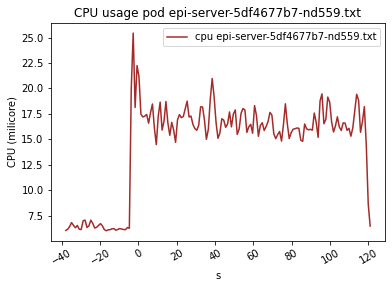

f_name:  ../hpa_test_data/TEST_NO_2_20210621105849/epi-proxy-5447cc89bf-5j2mk.txt


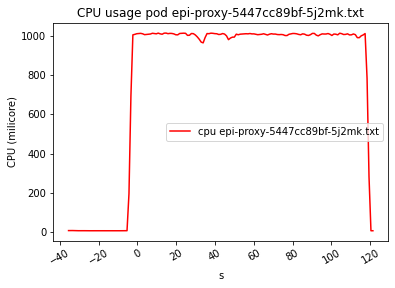

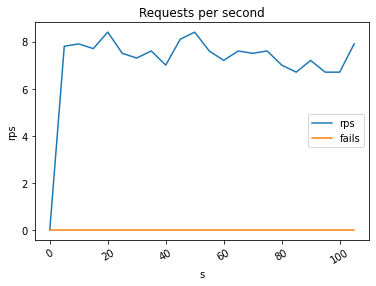

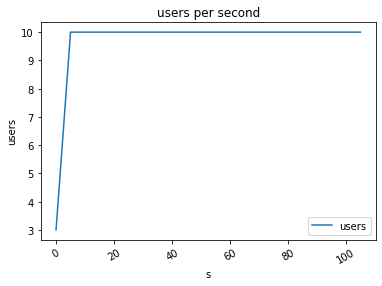

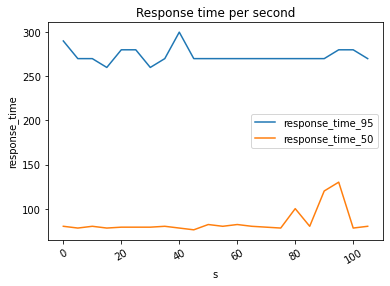

Directory: TEST_NO_15_20210621113716
data directory: ../hpa_test_data/TEST_NO_15_20210621113716
epi-bf-65b758fc7b-dd8gl.txt
f_name:  ../hpa_test_data/TEST_NO_15_20210621113716/epi-bf-65b758fc7b-dd8gl.txt


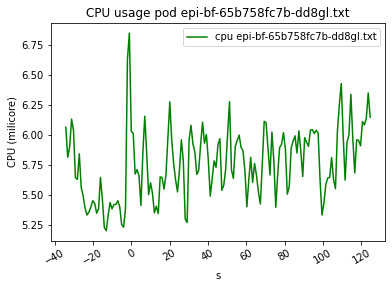

f_name:  ../hpa_test_data/TEST_NO_15_20210621113716/epi-proxy-5447cc89bf-dcldg.txt


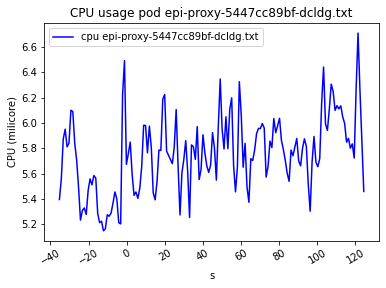

f_name:  ../hpa_test_data/TEST_NO_15_20210621113716/epi-server-5df4677b7-r7w78.txt


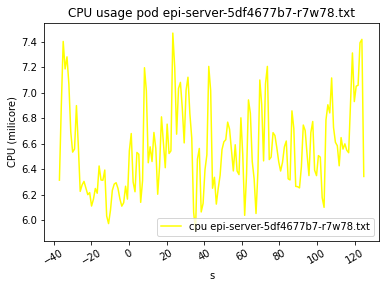

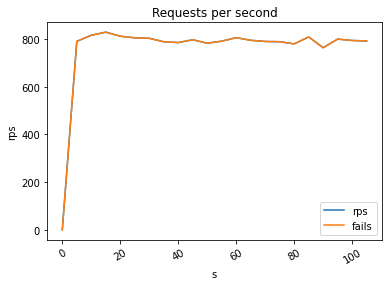

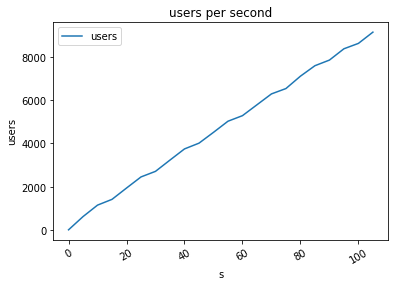

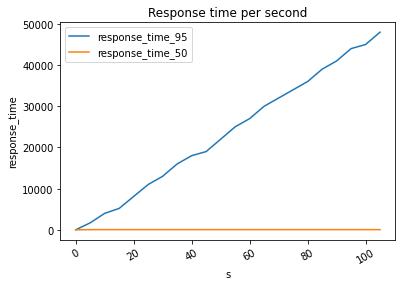

Directory: TEST_NO_1_20210621114439
data directory: ../hpa_test_data/TEST_NO_1_20210621114439
epi-bf-7fccdf5f46-28pbr.txt
f_name:  ../hpa_test_data/TEST_NO_1_20210621114439/epi-bf-7fccdf5f46-28pbr.txt
epi-bf-7fccdf5f46-58w9l.txt
f_name:  ../hpa_test_data/TEST_NO_1_20210621114439/epi-bf-7fccdf5f46-58w9l.txt
epi-bf-7fccdf5f46-6vn64.txt
f_name:  ../hpa_test_data/TEST_NO_1_20210621114439/epi-bf-7fccdf5f46-6vn64.txt
epi-bf-7fccdf5f46-klzts.txt
f_name:  ../hpa_test_data/TEST_NO_1_20210621114439/epi-bf-7fccdf5f46-klzts.txt
epi-bf-7fccdf5f46-gtnfq.txt
f_name:  ../hpa_test_data/TEST_NO_1_20210621114439/epi-bf-7fccdf5f46-gtnfq.txt


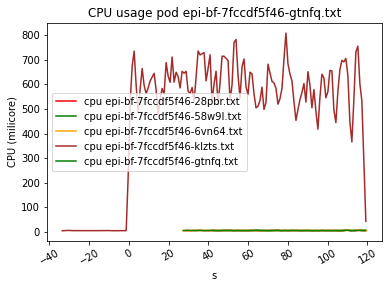

f_name:  ../hpa_test_data/TEST_NO_1_20210621114439/epi-proxy-5447cc89bf-jjj5l.txt


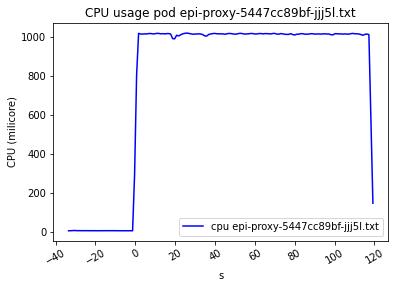

f_name:  ../hpa_test_data/TEST_NO_1_20210621114439/epi-server-5df4677b7-z8wmn.txt


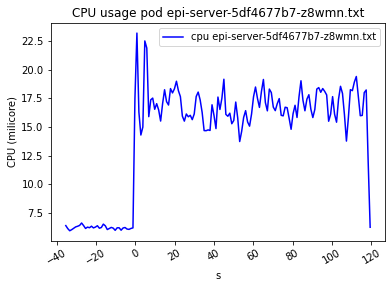

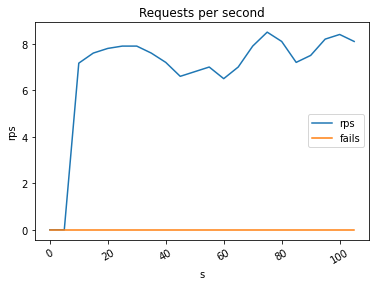

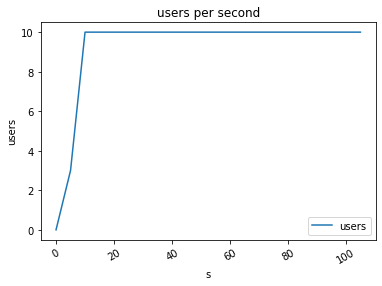

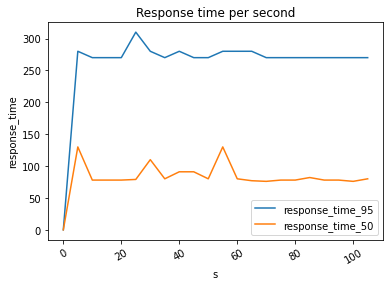

Directory: TEST_NO_11_20210621112510
data directory: ../hpa_test_data/TEST_NO_11_20210621112510
epi-bf-65b758fc7b-lpqns.txt
f_name:  ../hpa_test_data/TEST_NO_11_20210621112510/epi-bf-65b758fc7b-lpqns.txt


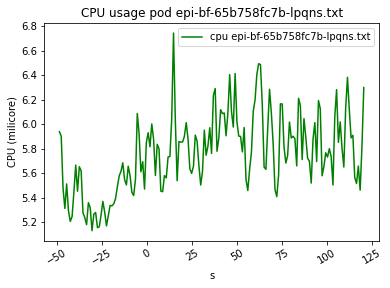

f_name:  ../hpa_test_data/TEST_NO_11_20210621112510/epi-server-5df4677b7-zqxkl.txt


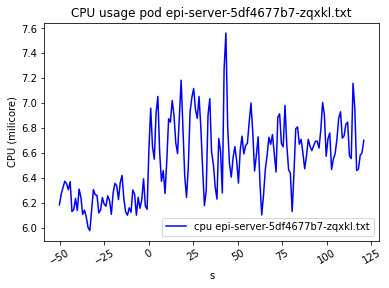

f_name:  ../hpa_test_data/TEST_NO_11_20210621112510/epi-proxy-5447cc89bf-vfd5v.txt


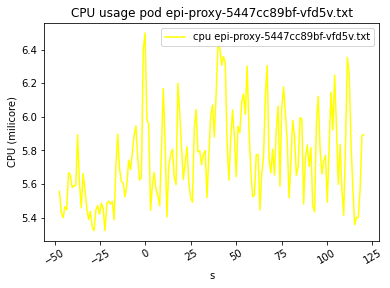

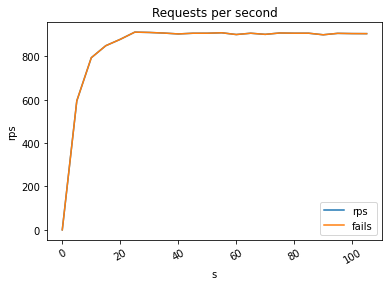

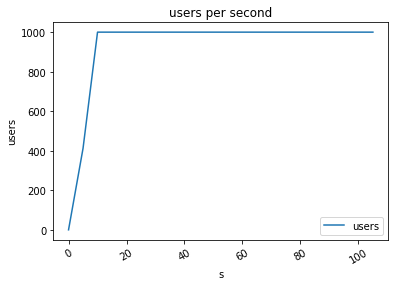

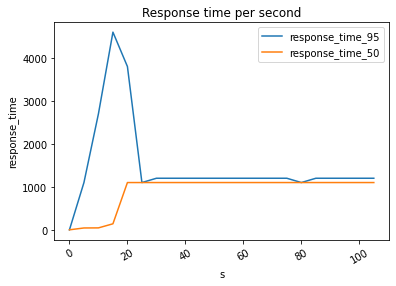

Directory: TEST_NO_13_20210621113120
data directory: ../hpa_test_data/TEST_NO_13_20210621113120
epi-bf-7fccdf5f46-sjv8t.txt
f_name:  ../hpa_test_data/TEST_NO_13_20210621113120/epi-bf-7fccdf5f46-sjv8t.txt


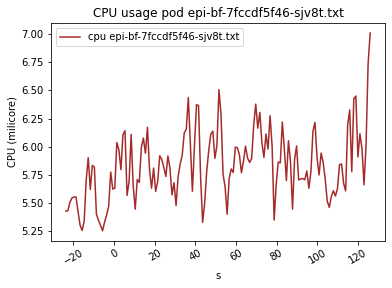

f_name:  ../hpa_test_data/TEST_NO_13_20210621113120/epi-server-5df4677b7-dtrlt.txt


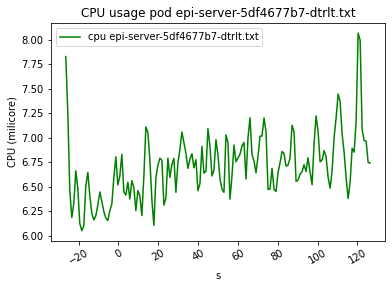

f_name:  ../hpa_test_data/TEST_NO_13_20210621113120/epi-proxy-5447cc89bf-vxxkt.txt


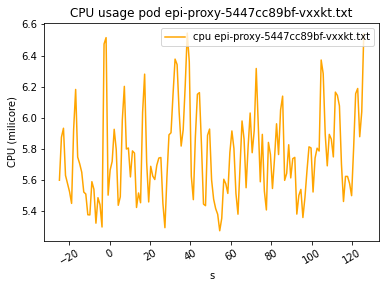

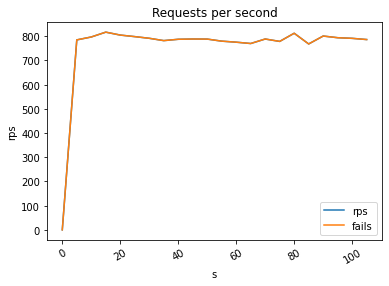

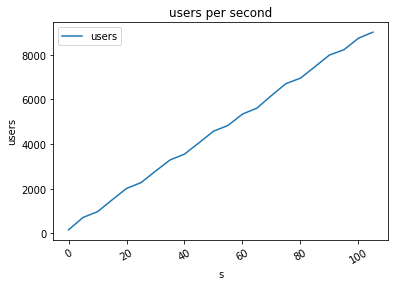

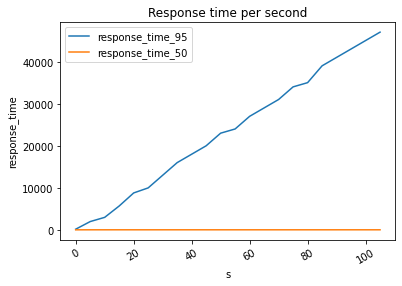

Directory: TEST_NO_4_20210621110430
data directory: ../hpa_test_data/TEST_NO_4_20210621110430
epi-bf-74d5f4df87-gdt9f.txt
f_name:  ../hpa_test_data/TEST_NO_4_20210621110430/epi-bf-74d5f4df87-gdt9f.txt
epi-bf-74d5f4df87-krfcf.txt
f_name:  ../hpa_test_data/TEST_NO_4_20210621110430/epi-bf-74d5f4df87-krfcf.txt
epi-bf-74d5f4df87-spqpq.txt
f_name:  ../hpa_test_data/TEST_NO_4_20210621110430/epi-bf-74d5f4df87-spqpq.txt
epi-bf-74d5f4df87-sc8cw.txt
f_name:  ../hpa_test_data/TEST_NO_4_20210621110430/epi-bf-74d5f4df87-sc8cw.txt


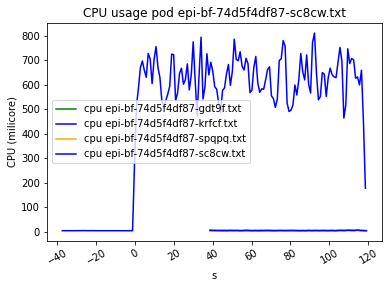

f_name:  ../hpa_test_data/TEST_NO_4_20210621110430/epi-proxy-5447cc89bf-k8zml.txt


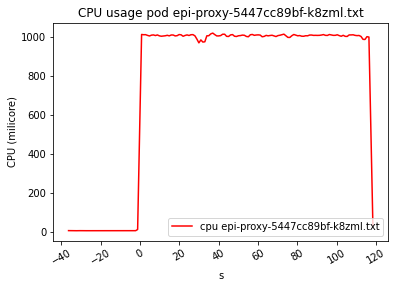

f_name:  ../hpa_test_data/TEST_NO_4_20210621110430/epi-server-5df4677b7-m7c4j.txt


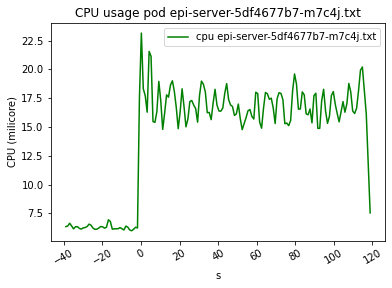

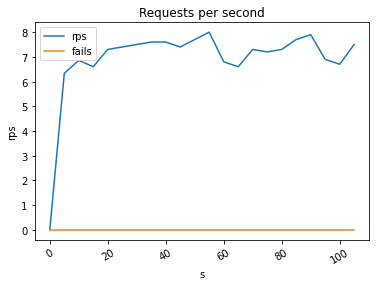

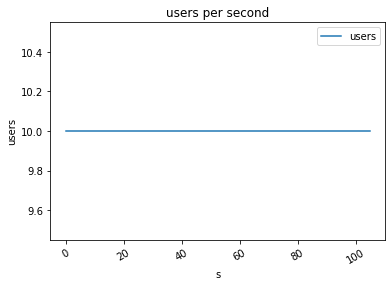

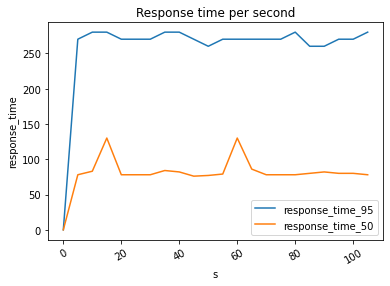

Directory: TEST_NO_8_20210621111627
data directory: ../hpa_test_data/TEST_NO_8_20210621111627
epi-bf-74d5f4df87-q7dj9.txt
f_name:  ../hpa_test_data/TEST_NO_8_20210621111627/epi-bf-74d5f4df87-q7dj9.txt
epi-bf-74d5f4df87-jmjmk.txt
f_name:  ../hpa_test_data/TEST_NO_8_20210621111627/epi-bf-74d5f4df87-jmjmk.txt
epi-bf-74d5f4df87-5mdqm.txt
f_name:  ../hpa_test_data/TEST_NO_8_20210621111627/epi-bf-74d5f4df87-5mdqm.txt
epi-bf-74d5f4df87-xrxjq.txt
f_name:  ../hpa_test_data/TEST_NO_8_20210621111627/epi-bf-74d5f4df87-xrxjq.txt


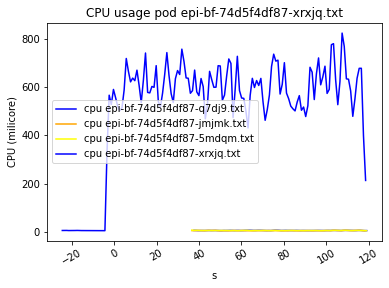

f_name:  ../hpa_test_data/TEST_NO_8_20210621111627/epi-proxy-5447cc89bf-qfrq5.txt


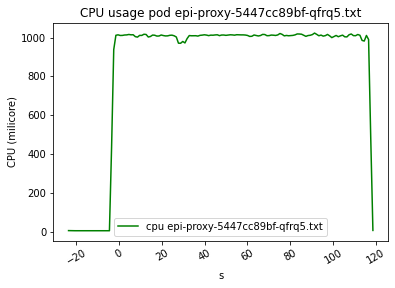

f_name:  ../hpa_test_data/TEST_NO_8_20210621111627/epi-server-5df4677b7-n9nzk.txt


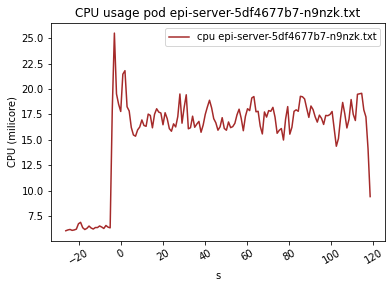

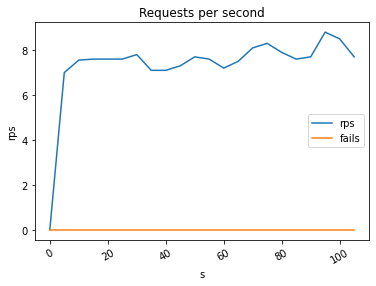

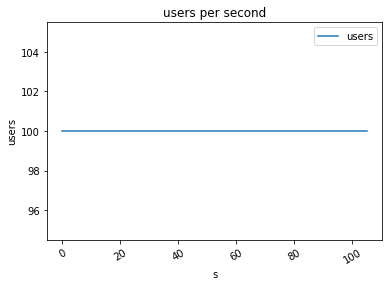

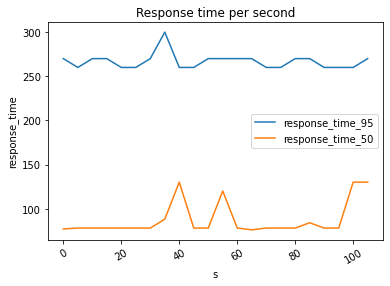

Directory: TEST_NO_14_20210621113410
data directory: ../hpa_test_data/TEST_NO_14_20210621113410
epi-bf-75bc7ff569-687j9.txt
f_name:  ../hpa_test_data/TEST_NO_14_20210621113410/epi-bf-75bc7ff569-687j9.txt


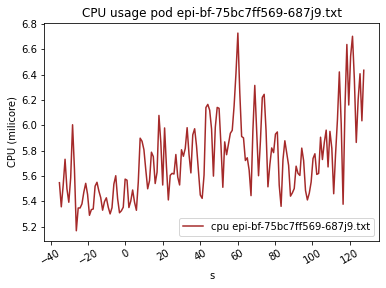

f_name:  ../hpa_test_data/TEST_NO_14_20210621113410/epi-server-5df4677b7-lccs2.txt


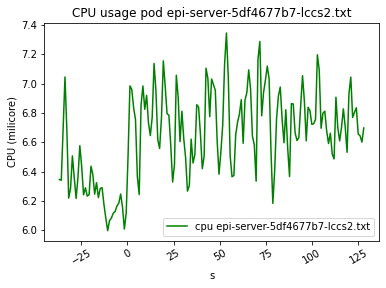

f_name:  ../hpa_test_data/TEST_NO_14_20210621113410/epi-proxy-5447cc89bf-jmqkl.txt


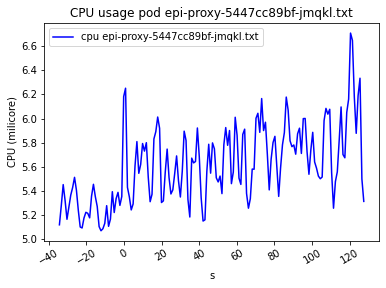

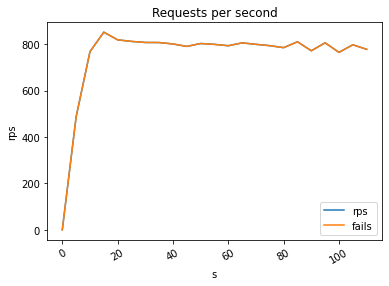

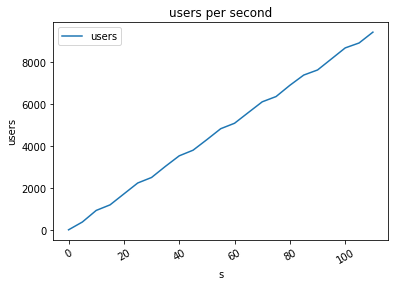

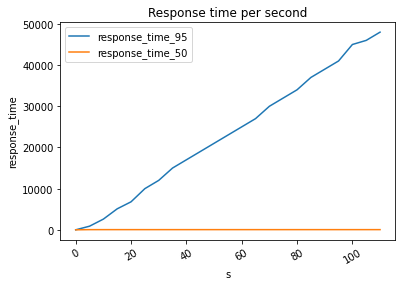

Directory: TEST_NO_5_20210621110722
data directory: ../hpa_test_data/TEST_NO_5_20210621110722
epi-bf-7fccdf5f46-czn9b.txt
f_name:  ../hpa_test_data/TEST_NO_5_20210621110722/epi-bf-7fccdf5f46-czn9b.txt
epi-bf-7fccdf5f46-6fhcv.txt
f_name:  ../hpa_test_data/TEST_NO_5_20210621110722/epi-bf-7fccdf5f46-6fhcv.txt
epi-bf-7fccdf5f46-6kgk7.txt
f_name:  ../hpa_test_data/TEST_NO_5_20210621110722/epi-bf-7fccdf5f46-6kgk7.txt
epi-bf-7fccdf5f46-fc8z4.txt
f_name:  ../hpa_test_data/TEST_NO_5_20210621110722/epi-bf-7fccdf5f46-fc8z4.txt
epi-bf-7fccdf5f46-jqmhn.txt
f_name:  ../hpa_test_data/TEST_NO_5_20210621110722/epi-bf-7fccdf5f46-jqmhn.txt


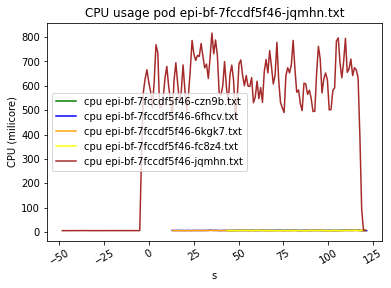

f_name:  ../hpa_test_data/TEST_NO_5_20210621110722/epi-server-5df4677b7-9jhk6.txt


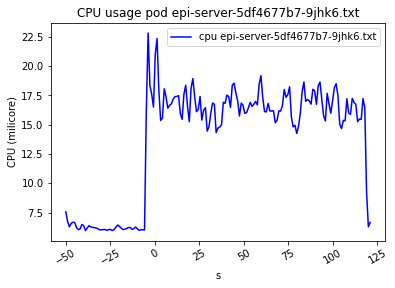

f_name:  ../hpa_test_data/TEST_NO_5_20210621110722/epi-proxy-5447cc89bf-x4v5z.txt


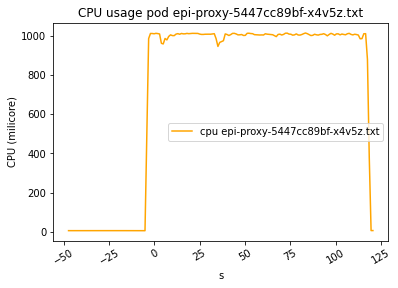

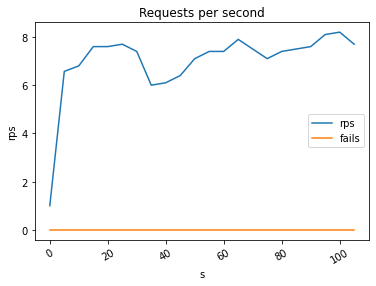

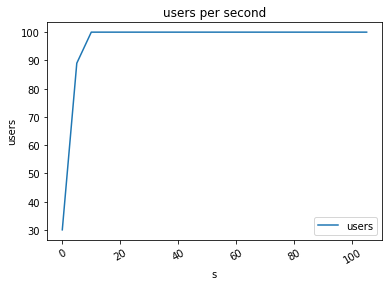

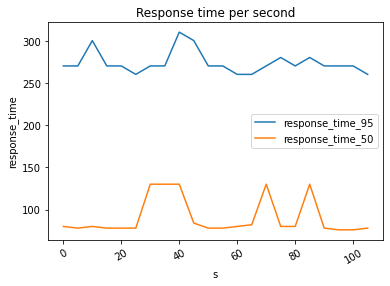

Directory: TEST_NO_12_20210621112818
data directory: ../hpa_test_data/TEST_NO_12_20210621112818
epi-bf-74d5f4df87-c5v5q.txt
f_name:  ../hpa_test_data/TEST_NO_12_20210621112818/epi-bf-74d5f4df87-c5v5q.txt


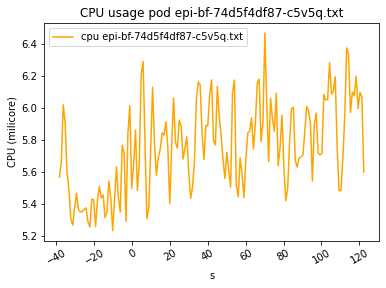

f_name:  ../hpa_test_data/TEST_NO_12_20210621112818/epi-proxy-5447cc89bf-bzxlm.txt


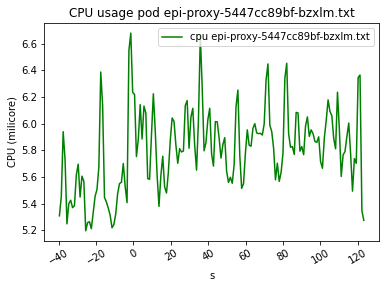

f_name:  ../hpa_test_data/TEST_NO_12_20210621112818/epi-server-5df4677b7-w5rkm.txt


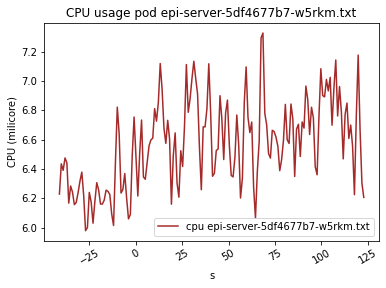

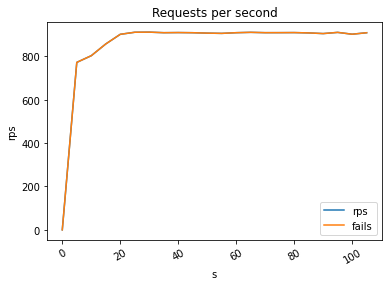

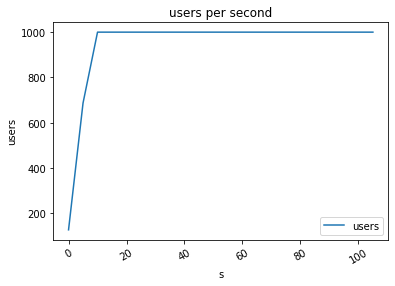

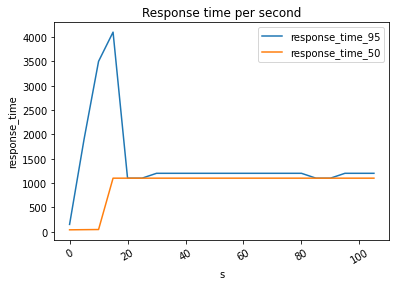

Directory: TEST_NO_7_20210621111320
data directory: ../hpa_test_data/TEST_NO_7_20210621111320
epi-bf-65b758fc7b-rjftr.txt
f_name:  ../hpa_test_data/TEST_NO_7_20210621111320/epi-bf-65b758fc7b-rjftr.txt
epi-bf-65b758fc7b-vrppc.txt
f_name:  ../hpa_test_data/TEST_NO_7_20210621111320/epi-bf-65b758fc7b-vrppc.txt
epi-bf-65b758fc7b-j76v2.txt
f_name:  ../hpa_test_data/TEST_NO_7_20210621111320/epi-bf-65b758fc7b-j76v2.txt
epi-bf-65b758fc7b-m2mnl.txt
f_name:  ../hpa_test_data/TEST_NO_7_20210621111320/epi-bf-65b758fc7b-m2mnl.txt
epi-bf-65b758fc7b-7nfb9.txt
f_name:  ../hpa_test_data/TEST_NO_7_20210621111320/epi-bf-65b758fc7b-7nfb9.txt


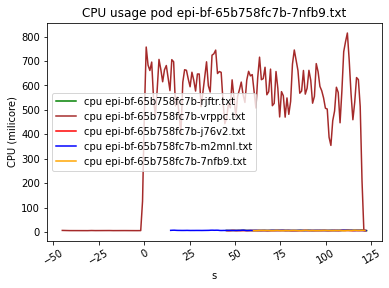

f_name:  ../hpa_test_data/TEST_NO_7_20210621111320/epi-proxy-5447cc89bf-lmh9t.txt


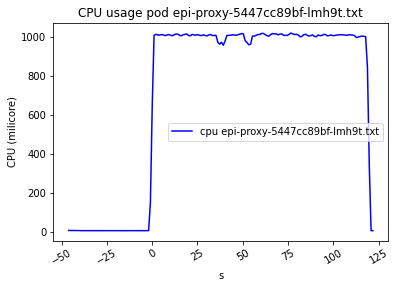

f_name:  ../hpa_test_data/TEST_NO_7_20210621111320/epi-server-5df4677b7-ldhtg.txt


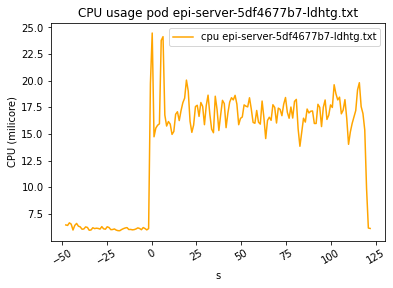

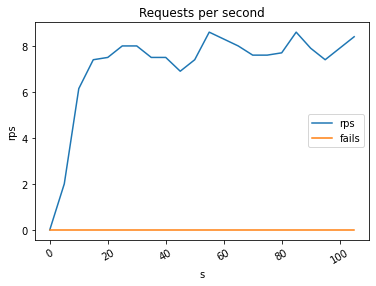

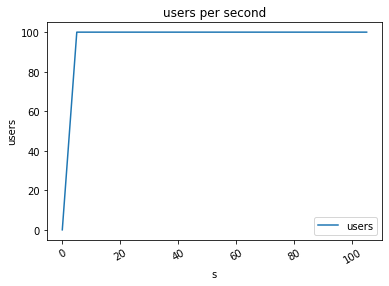

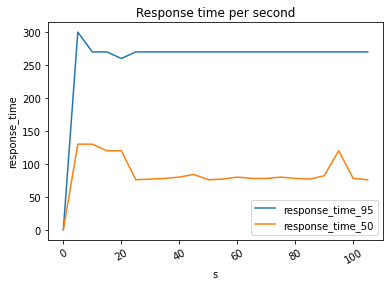

Directory: TEST_NO_3_20210621110145
data directory: ../hpa_test_data/TEST_NO_3_20210621110145
epi-bf-65b758fc7b-jcjvh.txt
f_name:  ../hpa_test_data/TEST_NO_3_20210621110145/epi-bf-65b758fc7b-jcjvh.txt
epi-bf-65b758fc7b-fmwvn.txt
f_name:  ../hpa_test_data/TEST_NO_3_20210621110145/epi-bf-65b758fc7b-fmwvn.txt
epi-bf-65b758fc7b-hpnlr.txt
f_name:  ../hpa_test_data/TEST_NO_3_20210621110145/epi-bf-65b758fc7b-hpnlr.txt
epi-bf-65b758fc7b-kh79j.txt
f_name:  ../hpa_test_data/TEST_NO_3_20210621110145/epi-bf-65b758fc7b-kh79j.txt
epi-bf-65b758fc7b-jmmvh.txt
f_name:  ../hpa_test_data/TEST_NO_3_20210621110145/epi-bf-65b758fc7b-jmmvh.txt


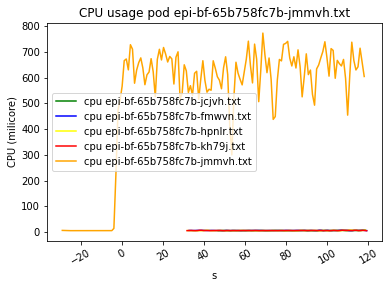

f_name:  ../hpa_test_data/TEST_NO_3_20210621110145/epi-proxy-5447cc89bf-5zpkw.txt


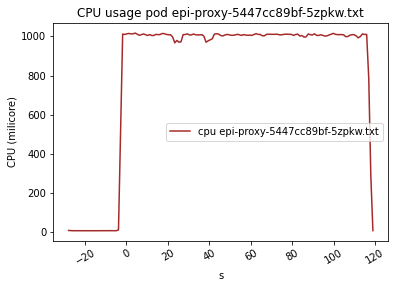

f_name:  ../hpa_test_data/TEST_NO_3_20210621110145/epi-server-5df4677b7-s89vt.txt


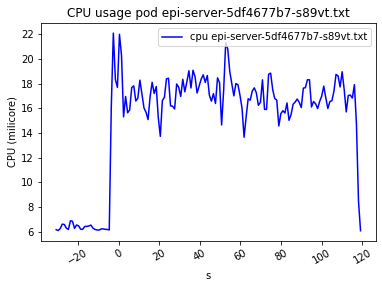

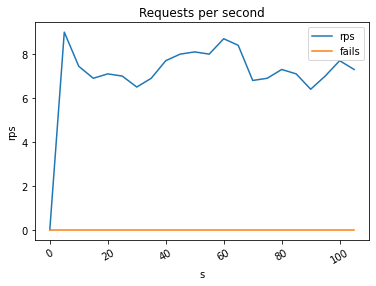

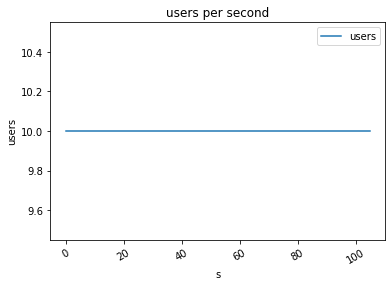

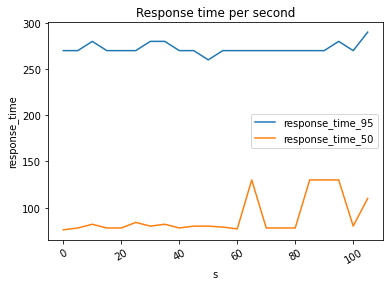

In [8]:
def get_time_in_s(x):
    x = x.split("T")[-1]
    x = datetime.strptime(x, '%H:%M:%S.%f')
    a_timedelta = x - datetime(1900, 1, 1)
    seconds = a_timedelta.total_seconds()
    return seconds

def get_time_date(x):
    x = x.split("T")[-1]
    x = datetime.strptime(x, '%H:%M:%S.%f')
    return x

def locust_get_time_in_s(x):
    a_timedelta = x - datetime(1900, 1, 1)
    seconds = a_timedelta.total_seconds()
    
    return seconds 

def locust_get_time(x):
    return datetime.strptime(x, "%H:%M:%S")

def plot_request_per_second(df_locust):
    plt.title("Requests per second")
    plt.plot(df_locust["Time_in_s"], df_locust["values"], label="rps")
    plt.plot(df_locust["Time_in_s"], df_locust["fails"], label="fails")
    plt.xlabel("s")
    plt.ylabel("rps")
    plt.xticks(rotation=30)
    plt.legend()
    plt.show()

def plot_users_per_second(df_locust):
    plt.title("users per second")
    plt.plot(df_locust["Time_in_s"], df_locust["users"], label="users")
    plt.xlabel("s")
    plt.ylabel("users")
    plt.xticks(rotation=30)
    plt.legend()
    plt.show()    
    

    
def plot_response_times_per_second(df_locust):
    plt.title("Response time per second")
    plt.plot(df_locust["Time_in_s"], df_locust["response_time_95"], label="response_time_95")
    plt.plot(df_locust["Time_in_s"], df_locust["response_time_50"], label="response_time_50")
    plt.xlabel("s")
    plt.ylabel("response_time")
    plt.xticks(rotation=30)
    plt.legend()
    plt.show()   
    
def plot_memory(df):
    plt.plot(df["Time_in_s"], df["Memory"])
    plt.xlabel("s")
    plt.xticks(rotation=30)
    plt.ylabel("Memory")
    plt.show()

def plot_cpu_per_pod(df, pod, color="b"):
    plt.title(f"CPU usage pod {pod}")
        
    # Plot the cpu at a gradient of 1 precent, get microseconds of CPU per s (milicore)
    plt.plot(df["Time_in_s"], np.gradient(df["CPU"]), label=f"cpu {pod}", color=color)

#     if "proxy" in pod:
#         # Plot bf cpu request and limit
#         plt.axhline(int(PROXY_LIMITS_CPU.replace("m", "")), color="r", label=f"CPU limit {pod}")
#         plt.axhline(int(PROXY_REQUEST_CPU.replace("m", "")), color="g", label=f"CPU request{pod}")
        
#     if "server" in pod:
#         # Plot bf cpu request and limit
#         plt.axhline(int(SERVER_LIMITS_CPU.replace("m", "")), color="r", label=f"CPU limit {pod}")
#         plt.axhline(int(SERVER_REQUEST_CPU.replace("m", "")), color="g", label=f"CPU request{pod}") 
        
#     if "epi-bf" in pod:
#         # Plot bf cpu request and limit
#         plt.axhline(int(BF_LIMITS_CPU.replace("m", "")), color="r", label=f"CPU limit {pod}")
#         plt.axhline(int(BF_REQUEST_CPU.replace("m", "")), color="g", label=f"CPU request{pod}")

#     if "locust" in pod:
#         # Plot bf cpu request and limit
#         plt.axhline(int(CLIENT_LIMITS_CPU.replace("m", "")), color="r", label=f"locust CPU limit {pod}")
#         plt.axhline(int(CLIENT_REQUEST_CPU.replace("m", "")), color="g", label=f"locust request {pod}")


    plt.xlabel("s")
    plt.ylabel("CPU (milicore)")
    plt.xticks(rotation=30)
    plt.legend()
        
        
main_data_dir="../hpa_test_data"

for d_name in os.listdir(main_data_dir):
    print("Directory:", d_name)
#     if d_name != "TEST_NO_4_20210618200735":
#         continue
        
    data_directory = f"{main_data_dir}/{d_name}"
    print(f"data directory: {data_directory}")
    
    # Get locust data
    locust_csv = f"{data_directory}/locust_data.csv"
    df_locust = pd.read_csv(locust_csv)
    df_locust['time'] = df_locust['time'].apply(lambda x: locust_get_time(x))
    df_locust["Time_in_s"] = df_locust["time"].apply(lambda x: locust_get_time_in_s(x))
    # Start point to make everything start at zero seconds
    start_point = df_locust["Time_in_s"][0] 
    df_locust["Time_in_s"] = df_locust["Time_in_s"] -  start_point  


    # Get bf milicore data
    with open(f"{data_directory}/bf_milicore.txt") as f:
        for i, x in enumerate(f.readlines()):
            if i == 0:
                BF_LIMITS_CPU, BF_REQUEST_CPU, BF_LIMITS_MEM, BF_REQUEST_MEM = x.split(",")
            if i == 1:
                SERVER_LIMITS_CPU, SERVER_REQUEST_CPU, SERVER_LIMITS_MEM, SERVER_REQUEST_MEM = x.split(",")
            if i == 2:
                PROXY_LIMITS_CPU, PROXY_REQUEST_CPU, PROXY_LIMITS_MEM, PROXY_REQUEST_MEM = x.split(",")
            if i == 3:
                CLIENT_LIMITS_CPU, CLIENT_REQUEST_CPU, CLIENT_LIMITS_MEM, CLIENT_REQUEST_MEM = x.split(",")

    colors = ["r", "g", "b", "orange", "yellow", "brown"]

    # Plot EPI
    for i, pod in enumerate(os.listdir(data_directory)):
        if not pod.startswith("epi-bf"):
            continue
            
        print(pod)
        f_name = f"{data_directory}/" + pod
        print("f_name: ", f_name)
        
        df = pd.read_csv(f_name, delimiter=",")
        df = df.iloc[5:]
        df = df.reset_index()
        # Convert values 
        df["Time_in_s"] = df["Time"].apply(lambda x: get_time_in_s(x))
        # Locust has zero point
        df["Time_in_s"] = df["Time_in_s"] - start_point
        df["Time_datetime"] = df["Time"].apply(lambda x: get_time_date(x))
        # cpu is in nanosecond so dive by 1000 is microsecond divide by 100 is milicore
        df["CPU"] = (df["CPU"] / 1000) / 1000
        
        plot_cpu_per_pod(df, pod, color=colors[i % len(colors)])
        
    plt.show()

    for i, pod in enumerate(os.listdir(data_directory)):
        if pod.startswith("locust_data") or pod.startswith("bf") or \
            pod.startswith("locust_stat") or pod.startswith("vms_stats.csv") \
            or pod.startswith("epi-bf"):
            continue
        
        f_name = f"{data_directory}/" + pod
        print("f_name: ", f_name)
        
        df = pd.read_csv(f_name, delimiter=",")
        df = df.iloc[5:]
        df = df.reset_index()
        # Convert values 
        df["Time_in_s"] = df["Time"].apply(lambda x: get_time_in_s(x))
        # Locust has zero point
        df["Time_in_s"] = df["Time_in_s"] - start_point
        df["Time_datetime"] = df["Time"].apply(lambda x: get_time_date(x))
        # cpu is in nanosecond so dive by 1000 is microsecond divide by 100 is milicore
        df["CPU"] = (df["CPU"] / 1000) / 1000

        plot_cpu_per_pod(df, pod, color=colors[i % len(colors)])

#         plot_memory(df)

#         plt.ylim(0, 20)
        
        plt.show()
    
    plot_request_per_second(df_locust)
    plot_users_per_second(df_locust)
    plot_response_times_per_second(df_locust)

    exit(1)